# Compartmental model



In [0]:
import numpy as np
from scipy.optimize import curve_fit,minimize
from scipy import stats,integrate,optimize
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import requests
import pandas as pd
import json

## SI Model

In [0]:
def SI_model(y,t,beta):
  s = y[0]
  i = y[1]
  ds_dt = -beta * s * i  
  di_dt = beta * s * i
  return ([ds_dt,di_dt])

In [0]:
#initial conditions
s0 = 0.99
i0 = 0.01
beta = 0.1

#Time vector
t= np.arange(0,101)

#Result
solution = integrate.odeint(SI_model,[s0,i0],t,args=(beta,))
solution = np.array(solution)

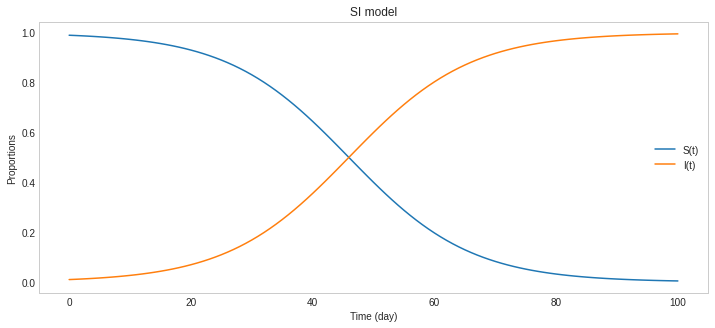

In [7]:
#plot
plt.figure(figsize=(12,5))
plt.plot(t,solution[:,0],label ="S(t)")
plt.plot(t,solution[:,1],label ="I(t)")
plt.grid()
plt.legend()
plt.xlabel("Time (day)")
plt.ylabel("Proportions")
plt.title("SI model")
plt.show()

## SIS model

In [0]:
def SIS_model(y,t,beta,gamma):
  s = y[0]
  i = y[1]
  ds_dt = -beta * s * i + gamma * i 
  di_dt = beta * s * i - gamma * i
  return ([ds_dt,di_dt])

In [0]:
#initial conditions
s0 = 0.99
i0 = 0.01
beta = 0.25
gamma = 0.1

#Time vector
t= np.arange(0,101)

#Result
solution = integrate.odeint(SIS_model,[s0,i0],t,args=(beta,gamma))
solution = np.array(solution)

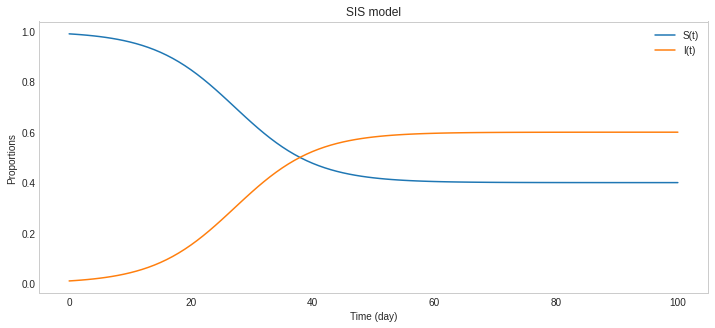

In [10]:
#plot
plt.figure(figsize=(12,5))
plt.plot(t,solution[:,0],label ="S(t)")
plt.plot(t,solution[:,1],label ="I(t)")
plt.grid()
plt.legend()
plt.xlabel("Time (day)")
plt.ylabel("Proportions")
plt.title("SIS model")
plt.show()

## SIR model

In [0]:
def SIR_model(y,t,beta,gamma):
  s = y[0]
  i = y[1]
  r = y[2]
  ds_dt = -beta * s * i  
  di_dt = beta * s * i  - gamma*i
  dr_dt = gamma * i
  return ([ds_dt,di_dt,dr_dt])

In [0]:
#initial conditions
s0 = 0.99
i0 = 0.01
r0 = 0.0
beta = 0.25
gamma = 0.1

#Time vector
t= np.arange(0,200)

#Result
solution = integrate.odeint(SIR_model,[s0,i0,r0],t,args=(beta,gamma))
solution = np.array(solution)

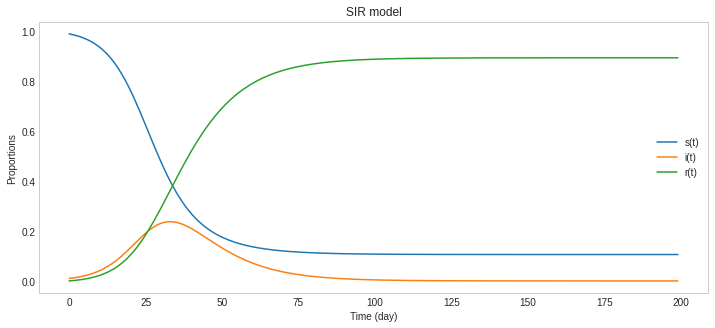

In [13]:
#plot
plt.figure(figsize=(12,5))
plt.plot(t,solution[:,0],label ="s(t)")
plt.plot(t,solution[:,1],label ="i(t)")
plt.plot(t,solution[:,2],label ="r(t)")
plt.grid()
plt.legend()
plt.xlabel("Time (day)")
plt.ylabel("Proportions")
plt.title("SIR model")
plt.show()

#### SIR model for COVID-19

In [0]:
#initial conditions
s0 = 1
i0 = 0.00001
r0 = 0.0
beta = 2.5/14
gamma = 1.0/14

#Time vector
t= np.arange(0,200)

#Result
solution = integrate.odeint(SIR_model,[s0,i0,r0],t,args=(beta,gamma))
solution = np.array(solution)

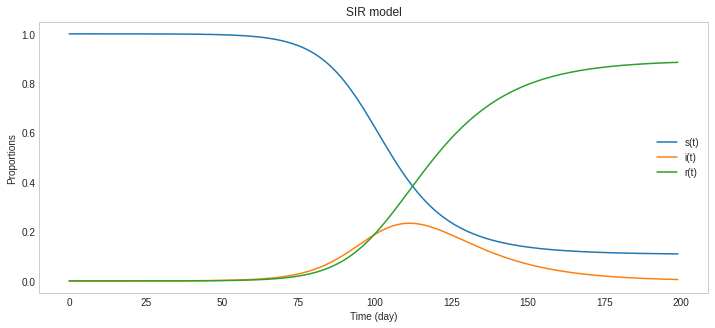

In [15]:
#plot
plt.figure(figsize=(12,5))
plt.plot(t,solution[:,0],label ="s(t)")
plt.plot(t,solution[:,1],label ="i(t)")
plt.plot(t,solution[:,2],label ="r(t)")
plt.grid()
plt.legend()
plt.xlabel("Time (day)")
plt.ylabel("Proportions")
plt.title("SIR model")
plt.show()

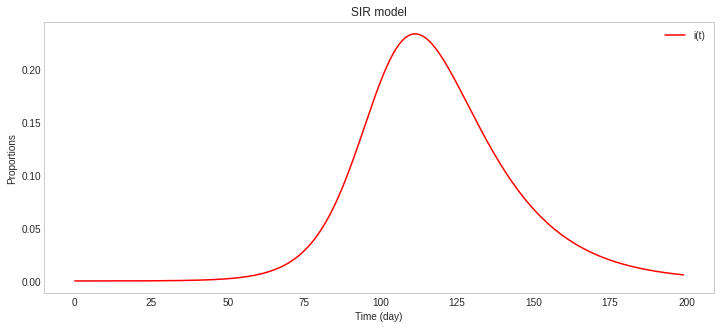

In [16]:
plt.figure(figsize=(12,5))
plt.plot(t,solution[:,1],label ="i(t)",color='red')
plt.grid()
plt.legend()
plt.xlabel("Time (day)")
plt.ylabel("Proportions")
plt.title("SIR model")
plt.show()

#### Different R_0

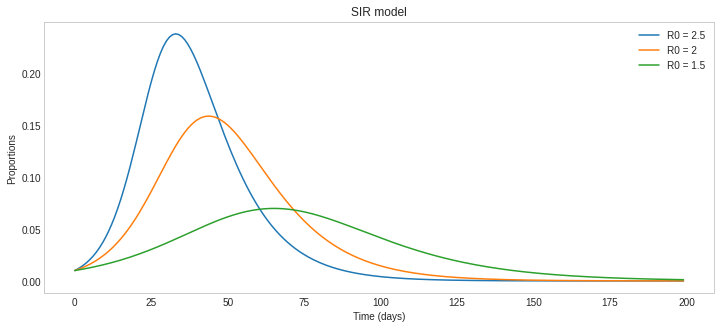

In [17]:
#initial conditions
s0 = 0.99
i0 = 0.01
r0 = 0.0
beta = 0.25
gamma = 0.1

#Time vector
t= np.arange(0,200)

#Result
solution_1 = integrate.odeint(SIR_model,[s0,i0,r0],t,args=(beta,gamma))
solution_1 = np.array(solution_1)

beta = 0.2
solution_2 = integrate.odeint(SIR_model,[s0,i0,r0],t,args=(beta,gamma))
solution_2 = np.array(solution_2)


beta = 0.15
solution_3 = integrate.odeint(SIR_model,[s0,i0,r0],t,args=(beta,gamma))
solution_3 = np.array(solution_3)

#plot
plt.figure(figsize=(12,5))
plt.plot(t,solution_1[:,1],label ="R0 = 2.5")
plt.plot(t,solution_2[:,1],label ="R0 = 2")
plt.plot(t,solution_3[:,1],label ="R0 = 1.5")
plt.grid()
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Proportions")
plt.title("SIR model")
plt.show()

#### Intervention


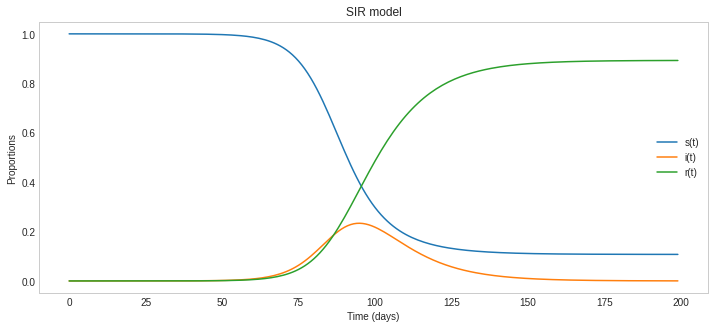

In [18]:
#initial conditions
s0 = 1
i0 = 0.000001
r0 = 0.0
beta = 0.25
gamma = 0.1

#Time vector
t= np.arange(0,200)

#Result
solution = integrate.odeint(SIR_model,[s0,i0,r0],t,args=(beta,gamma))
solution = np.array(solution)

#plot
plt.figure(figsize=(12,5))
plt.plot(t,solution[:,0],label ="s(t)")
plt.plot(t,solution[:,1],label ="i(t)")
plt.plot(t,solution[:,2],label ="r(t)")
plt.grid()
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Proportions")
plt.title("SIR model")
plt.show()

Intervene on day 75

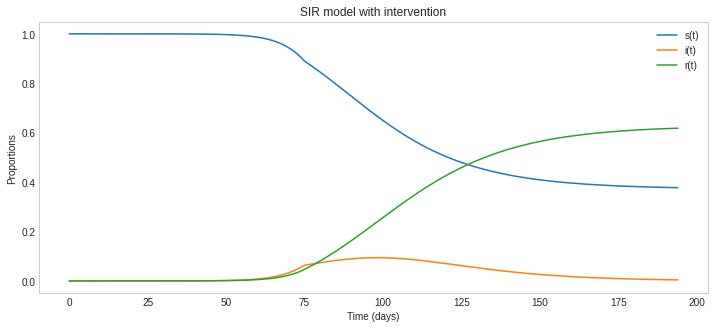

In [19]:
#initial conditions
s0 = 1
i0 = 0.000001
r0 = 0.0
beta = 0.25
gamma = 0.1

intervene_day = 75
#Time vector
t_before= np.arange(0,200)

#Result
solution_before = integrate.odeint(SIR_model,[s0,i0,r0],t_before,args=(beta,gamma))
solution_before = np.array(solution_before)

s0 = solution_before[intervene_day,0]
i0 = solution_before[intervene_day,1]
r0 = solution_before[intervene_day,2]
beta = 0.15
t_after=np.arange(0,120)
solution_after = integrate.odeint(SIR_model,[s0,i0,r0],t_after,args=(beta,gamma))
solution_after = np.array(solution_after)



merge_solution = np.concatenate((solution_before[:intervene_day,:],solution_after))
merge_t = np.arange(0,intervene_day+len(t_after))
#plot
plt.figure(figsize=(12,5))
plt.plot(merge_t,merge_solution[:,0],label ="s(t)")
plt.plot(merge_t,merge_solution[:,1],label ="i(t)")
plt.plot(merge_t,merge_solution[:,2],label ="r(t)")
plt.grid()
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Proportions")
plt.title("SIR model with intervention")
plt.show()

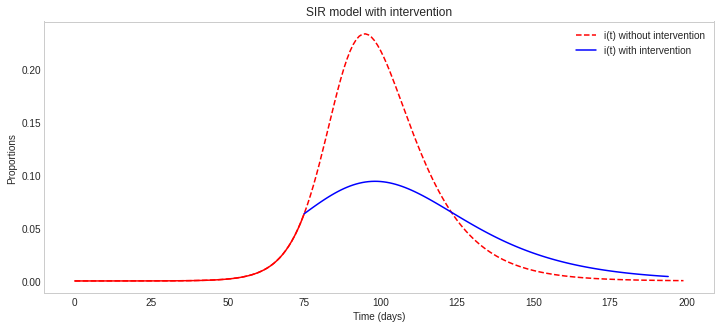

In [20]:
#plot
plt.figure(figsize=(12,5))
plt.plot(t_before,solution_before[:,1],'--r',label ="i(t) without intervention")
plt.plot(t_before[:intervene_day+1],solution_before[:intervene_day+1,1],color = 'r')
plt.plot(merge_t[intervene_day:],merge_solution[intervene_day:,1],'b',label ="i(t) with intervention")
plt.grid()
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Proportions")
plt.title("SIR model with intervention")
plt.show()

Intervene on day 100

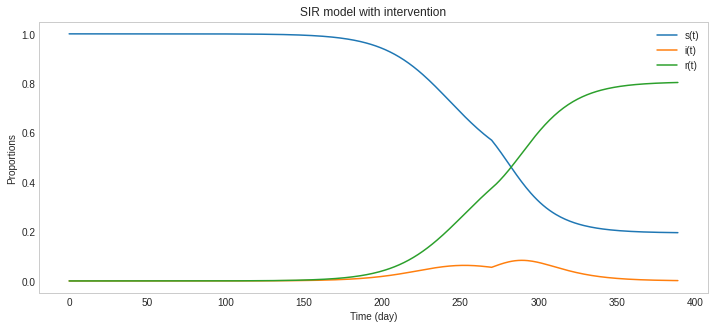

In [21]:
#initial conditions
s0 = 1
i0 = 0.000001
r0 = 0.0
beta = 0.15
gamma = 0.1

intervene_day = 270
#Time vector
t_before= np.arange(0,500)

#Result
solution_before = integrate.odeint(SIR_model,[s0,i0,r0],t_before,args=(beta,gamma))
solution_before = np.array(solution_before)

s0 = solution_before[intervene_day,0]
i0 = solution_before[intervene_day,1]
r0 = solution_before[intervene_day,2]
beta = 0.25
t_after=np.arange(0,120)
solution_after = integrate.odeint(SIR_model,[s0,i0,r0],t_after,args=(beta,gamma))
solution_after = np.array(solution_after)


merge_solution = np.concatenate((solution_before[:intervene_day,:],solution_after))
merge_t = np.arange(0,intervene_day+len(t_after))
#plot
plt.figure(figsize=(12,5))
plt.plot(merge_t,merge_solution[:,0],label ="s(t)")
plt.plot(merge_t,merge_solution[:,1],label ="i(t)")
plt.plot(merge_t,merge_solution[:,2],label ="r(t)")
plt.grid()
plt.legend()
plt.xlabel("Time (day)")
plt.ylabel("Proportions")
plt.title("SIR model with intervention")
plt.show()

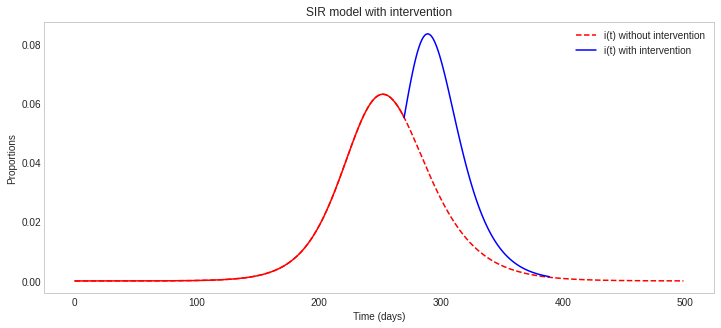

In [22]:
#plot
plt.figure(figsize=(12,5))
plt.plot(t_before,solution_before[:,1],'--r',label ="i(t) without intervention")
plt.plot(t_before[:intervene_day+1],solution_before[:intervene_day+1,1],color = 'r')
plt.plot(merge_t[intervene_day:],merge_solution[intervene_day:,1],'b',label ="i(t) with intervention")
plt.grid()
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Proportions")
plt.title("SIR model with intervention")
plt.show()

## SEIR model


In [0]:
def SEIR_model(y,t,beta,gamma,sigma):
  s = y[0]
  e = y[1]
  i = y[2]
  r = y[3]
  ds_dt = -beta * s * i
  de_dt = beta * s * i  - sigma*e 
  di_dt = sigma*e -gamma*i
  dr_dt = gamma * i
  return ([ds_dt,de_dt,di_dt,dr_dt])

In [0]:
#initial conditions
s0 = 0.999999
e0 = 0.000001
i0 = 0
r0 = 0.0
beta = 0.44
gamma = 0.2
sigma = 0.2
#Time vector
t= np.arange(0,201)

#Result
solution = integrate.odeint(SEIR_model,[s0,e0,i0,r0],t,args=(beta,gamma,sigma))
solution = np.array(solution)

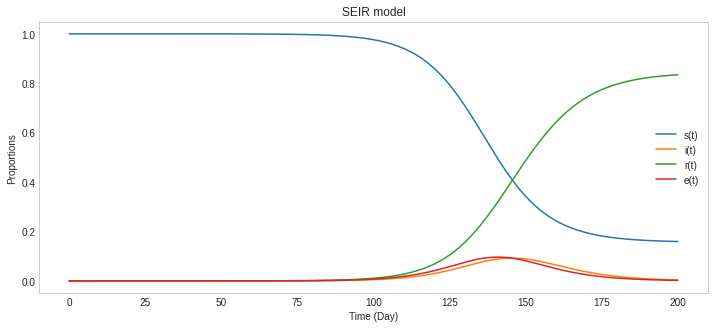

In [25]:
#plot
plt.figure(figsize=(12,5))
plt.plot(t,solution[:,0],label ="s(t)")

plt.plot(t,solution[:,2],label ="i(t)")
plt.plot(t,solution[:,3],label ="r(t)")
plt.plot(t,solution[:,1],label ="e(t)")
plt.grid()
plt.legend()
plt.xlabel("Time (Day)")
plt.ylabel("Proportions")
plt.title("SEIR model")
plt.show()

### SIR model in frequency 

In [0]:
def SIR_model_freq(y,t,beta,gamma):
  S = y[0]
  I = y[1]
  R = y[2]
  N = S + I + R
  dS_dt = -beta *S * I / (N)  
  dI_dt = beta * S * I / (N)  - gamma*I
  dR_dt = gamma * I
  return ([dS_dt,dI_dt,dR_dt])

In [0]:
#initial conditions (in frequency)
S0 = 100
I0 = 1
R0 = 0.0
beta = 0.25
gamma = 0.1

#Time vector
t= np.linspace(0,200)

#Result
solution = integrate.odeint(SIR_model_freq,[S0,I0,R0],t,args=(beta,gamma))
solution = np.array(solution)

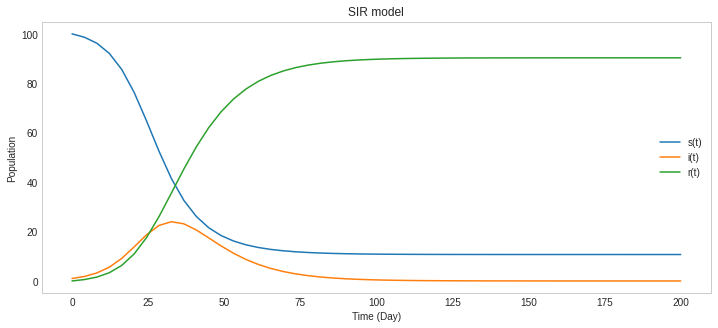

In [28]:
#plot
plt.figure(figsize=(12,5))
plt.plot(t,solution[:,0],label ="s(t)")
plt.plot(t,solution[:,1],label ="i(t)")
plt.plot(t,solution[:,2],label ="r(t)")
plt.grid()
plt.legend()
plt.xlabel("Time (Day)")
plt.ylabel("Population")
plt.title("SIR model")
plt.show()

# Prepare dataset

In [0]:
data_url= 'https://covid19.th-stat.com/api/open/timeline'
req=requests.get(data_url)
daily_case_report_list  = json.loads(req.content.decode('utf8').replace("'", '"'))['Data'] # convert byte array to list of json
daily_case_report = pd.DataFrame(data=daily_case_report_list)
daily_case_report = daily_case_report[daily_case_report['Confirmed']>0]

In [30]:
daily_case_report.tail(20)

,Date,NewConfirmed,NewRecovered,NewHospitalized,NewDeaths,Confirmed,Recovered,Hospitalized,Deaths
97,04/07/2020,38,31,6,1,2258,824,1407,27
98,04/08/2020,111,64,44,3,2369,888,1451,30
99,04/09/2020,54,52,0,2,2423,940,1451,32
100,04/10/2020,50,73,-24,1,2473,1013,1427,33
101,04/11/2020,45,122,-79,2,2518,1135,1348,35
102,04/12/2020,33,83,-53,3,2551,1218,1295,38
103,04/13/2020,28,70,-44,2,2579,1288,1251,40
104,04/14/2020,34,117,-84,1,2613,1405,1167,41
105,04/15/2020,30,92,-64,2,2643,1497,1103,43
106,04/16/2020,29,96,-70,3,2672,1593,1033,46


In [0]:
daily_active_case = daily_case_report['Hospitalized']

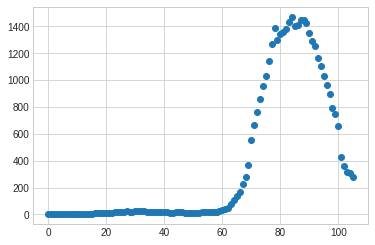

In [32]:
x_train = np.arange(0,daily_active_case.shape[0])
y_train = daily_active_case.to_numpy()
plt.scatter(x_train,y_train)
plt.show()

In [0]:
def mean_square_error(param,data):
  beta, gamma = param
  t = np.arange(0,len(data))
  #fit only I group
  y_pred = integrate.odeint(SIR_model_freq, [S0, I0, R0], t, args=(beta, gamma))[:,1]
  rmse = np.mean((y_pred - data)**2)
  return (rmse)
def sum_negative_log_likelihood_poisson (param,data):
  beta, gamma = param
  t = np.arange(0,len(data))
  #fit only I group
  y_pred = integrate.odeint(SIR_model_freq, [S0, I0, R0], t, args=(beta, gamma))[:,1]
  neg_log_likelihood = -np.sum(stats.poisson.logpmf(data, mu=y_pred))
  return (neg_log_likelihood)


### Fit with least square estimation

beta = 0.19657750000768234 gamma = 0.1
R0 = 1.9657750000768233


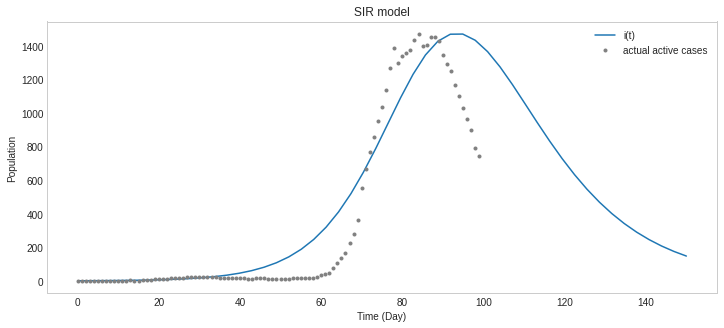

In [34]:
S0 = 10000
I0 = 1
R0 = 0
n_train = 100
x_train = np.arange(0,daily_active_case[:n_train].shape[0])
y_train = daily_active_case[:n_train].to_numpy()
initial_param = [1,1] #init beta and gamma
lse = minimize(mean_square_error,
    initial_param,args=(y_train),#method='Nelder-Mead'
    method='L-BFGS-B',bounds=[(0.0001, 5), (0.00001, 0.1)])
beta, gamma = lse.x
print('beta = '+str(beta)+ ' gamma = '+str(gamma))
print('R0 = '+str(beta/gamma))

#Time vector
t= np.linspace(0,150)

#Result
solution = integrate.odeint(SIR_model_freq,[S0,I0,R0],t,args=(beta,gamma))
solution = np.array(solution)

#plot
plt.figure(figsize=(12,5))
# plt.plot(t,solution[:,0],label ="s(t)")
plt.plot(t,solution[:,1],label ="i(t)")
# plt.plot(t,solution[:,2],label ="r(t)")
plt.plot(x_train, y_train, 'o',color='grey',markersize = 3,label='actual active cases')
plt.grid()
plt.legend()
plt.xlabel("Time (Day)")
plt.ylabel("Population")
plt.title("SIR model")
plt.show()

### Fit with maximum likelihood estimation

beta = 0.20363757150120795 gamma = 0.10929477512066396
R0 = 1.863195850637758


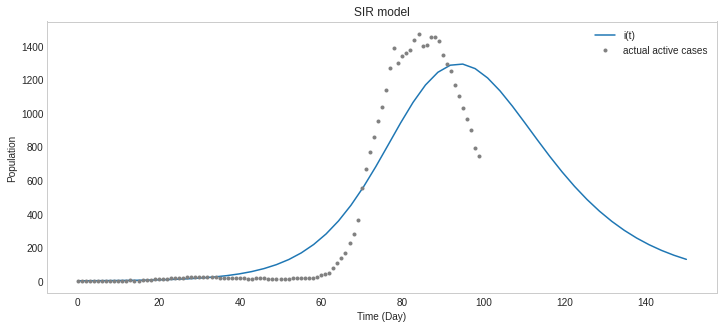

In [35]:
S0 = 10000
I0 = 1
R0 = 0
n_train = 100
x_train = np.arange(0,daily_active_case[:n_train].shape[0])
y_train = daily_active_case[:n_train].to_numpy()
initial_param = [0.1,0.1] #init beta and gamma
mle = minimize(sum_negative_log_likelihood_poisson,
    initial_param,args=(y_train),#method='Nelder-Mead'
    method='L-BFGS-B',bounds=[(0.000001, 5), (0.00001, 5)])
beta, gamma = mle.x
print('beta = '+str(beta)+ ' gamma = '+str(gamma))
print('R0 = '+str(beta/gamma))

#Time vector
t= np.linspace(0,150)

#Result
solution = integrate.odeint(SIR_model_freq,[S0,I0,R0],t,args=(beta,gamma))
solution = np.array(solution)

#plot
plt.figure(figsize=(12,5))
# plt.plot(t,solution[:,0],label ="s(t)")
plt.plot(t,solution[:,1],label ="i(t)")
# plt.plot(t,solution[:,2],label ="r(t)")
plt.plot(x_train, y_train, 'o',color='grey',markersize = 3,label='actual active cases')
plt.grid()
plt.legend()
plt.xlabel("Time (Day)")
plt.ylabel("Population")
plt.title("SIR model")
plt.show()